#Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

#Loading Dataset 

In [3]:
data = pd.read_csv("F:/Download(F)/Cars24.csv")
df=data

In [4]:
data.head()

,Unnamed: 0,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642


In [5]:
data.tail()

,Unnamed: 0,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
5913,5913,Toyota,Fortuner3.0 AT 4X2,1234899,2012,Chennai,Diesel,197177,Automatic,1,27470
5914,5914,Toyota,Innova2.5 VX 8 STR BS IV,892699,2012,Chennai,Diesel,115553,Manual,2,19858
5915,5915,Maruti,Wagon R 1.0VXI,381399,2014,Chennai,Petrol,24663,Manual,1,8484
5916,5916,Hyundai,i10SPORTZ 1.2 KAPPA2 O,310899,2011,Chennai,Petrol,30159,Manual,1,6916
5917,5917,Maruti,Wagon R DuoLXI LPG,159999,2007,Chennai,Petrol + LPG,51247,Manual,2,3559


In [6]:
data.shape


(5918, 11)

In [7]:
data.info

<bound method DataFrame.info of       Unnamed: 0 Car Brand                     Model    Price  Model Year  \
0              0   Hyundai               EonERA PLUS   330399        2016   
1              1    Maruti            Wagon R 1.0LXI   350199        2011   
2              2    Maruti               Alto K10LXI   229199        2011   
3              3    Maruti             RitzVXI BS IV   306399        2011   
4              4      Tata             NanoTWIST XTA   208699        2015   
...          ...       ...                       ...      ...         ...   
5913        5913    Toyota        Fortuner3.0 AT 4X2  1234899        2012   
5914        5914    Toyota  Innova2.5 VX 8 STR BS IV   892699        2012   
5915        5915    Maruti            Wagon R 1.0VXI   381399        2014   
5916        5916   Hyundai    i10SPORTZ 1.2 KAPPA2 O   310899        2011   
5917        5917    Maruti        Wagon R DuoLXI LPG   159999        2007   

       Location          Fuel  Driven (Kms)

In [8]:
data.isnull().sum()


Unnamed: 0         0
Car Brand          0
Model            265
Price              0
Model Year         0
Location           0
Fuel               0
Driven (Kms)       0
Gear             265
Ownership          0
EMI (monthly)      0
dtype: int64

In [9]:
data.describe()


,Unnamed: 0,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
count,5918.000000,5.918000e+03,5918.000000,5918.000000,5918.000000,5918.000000
mean,2958.500000,5.180530e+05,2014.547651,60842.778979,1.285738,11523.801284
std,1708.523778,3.224695e+05,2.905185,42362.990292,0.532820,7173.156118
min,0.000000,9.100000e+04,2007.000000,179.000000,1.000000,2024.000000
25%,1479.250000,3.205240e+05,2012.000000,30856.000000,1.000000,7129.750000
50%,2958.500000,4.303990e+05,2015.000000,53514.000000,1.000000,9574.000000
75%,4437.750000,6.157990e+05,2017.000000,81979.250000,1.000000,13698.000000
max,5917.000000,6.500000e+06,2021.000000,912380.000000,4.000000,144589.000000


In [10]:
data["Model"].isnull().sum()/data["Model"].count()
#ideally if the null values are less than the 5%of the total value we need not to eliminate them
#Same condition goes with the Gears that are being used in the cars.

np.float64(0.0468777640191049)

In [11]:
#Selecting or checking  the  coloums required for Analysis


In [12]:
data.head()


,Unnamed: 0,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642


In [13]:
#Dropping unwanted columns
data=data.drop(columns=["Car Brand","Model","Location"])
data.head()


,Unnamed: 0,Price,Model Year,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,0,330399,2016,Petrol,10674,Manual,2,7350
1,1,350199,2011,Petrol,20979,Manual,1,7790
2,2,229199,2011,Petrol,47330,Manual,2,5098
3,3,306399,2011,Petrol,19662,Manual,1,6816
4,4,208699,2015,Petrol,11256,Automatic,1,4642


In [14]:
#Visualize the data and analysing the relationship between independant and dependant variables

Categorical_features=[col for col in data.columns if data[col].dtype=='O']
Categorical_features

['Fuel', 'Gear']

In [15]:
Numerical_features=[col for col in data.columns if data[col].dtype!='O']
Numerical_features


['Unnamed: 0',
 'Price',
 'Model Year',
 'Driven (Kms)',
 'Ownership',
 'EMI (monthly)']

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight'

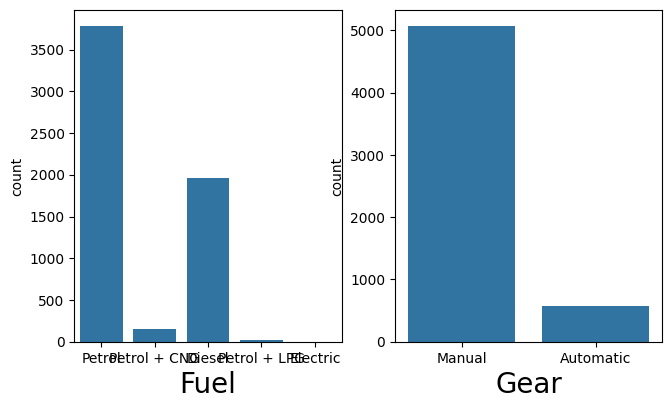

In [16]:
#lets see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in Categorical_features:
    if plotnumber<=4:
        ax=plt.subplot(5,5,plotnumber)
        sns.countplot(x=column,data=data)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight.layout()
        

In [17]:
data=pd.get_dummies(data)
data.head()


,Unnamed: 0,Price,Model Year,Driven (Kms),Ownership,EMI (monthly),Fuel_Diesel,Fuel_Electric,Fuel_Petrol,Fuel_Petrol + CNG,Fuel_Petrol + LPG,Gear_Automatic,Gear_Manual
0,0,330399,2016,10674,2,7350,False,False,True,False,False,False,True
1,1,350199,2011,20979,1,7790,False,False,True,False,False,False,True
2,2,229199,2011,47330,2,5098,False,False,True,False,False,False,True
3,3,306399,2011,19662,1,6816,False,False,True,False,False,False,True
4,4,208699,2015,11256,1,4642,False,False,True,False,False,True,False


In [18]:
data=data.replace({True: 1, False: 0})
data

C:\Users\HP\AppData\Local\Temp\ipykernel_17896\1238889993.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace({True: 1, False: 0})


,Unnamed: 0,Price,Model Year,Driven (Kms),Ownership,EMI (monthly),Fuel_Diesel,Fuel_Electric,Fuel_Petrol,Fuel_Petrol + CNG,Fuel_Petrol + LPG,Gear_Automatic,Gear_Manual
0,0,330399,2016,10674,2,7350,0,0,1,0,0,0,1
1,1,350199,2011,20979,1,7790,0,0,1,0,0,0,1
2,2,229199,2011,47330,2,5098,0,0,1,0,0,0,1
3,3,306399,2011,19662,1,6816,0,0,1,0,0,0,1
4,4,208699,2015,11256,1,4642,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,5913,1234899,2012,197177,1,27470,1,0,0,0,0,1,0
5914,5914,892699,2012,115553,2,19858,1,0,0,0,0,0,1
5915,5915,381399,2014,24663,1,8484,0,0,1,0,0,0,1
5916,5916,310899,2011,30159,1,6916,0,0,1,0,0,0,1


In [19]:
#create X(Independant data) and y(dependanr data)
feature=["Model Year","Driven (Kms)","Ownership","EMI (monthly)","Fuel_Diesel","Fuel_Electric","Fuel_Petrol","Fuel_Petrol + CNG","Fuel_Petrol + LPG","Gear_Automatic"]
X=data[feature]
Y=data.Price

In [20]:
X.head()

,Model Year,Driven (Kms),Ownership,EMI (monthly),Fuel_Diesel,Fuel_Electric,Fuel_Petrol,Fuel_Petrol + CNG,Fuel_Petrol + LPG,Gear_Automatic
0,2016,10674,2,7350,0,0,1,0,0,0
1,2011,20979,1,7790,0,0,1,0,0,0
2,2011,47330,2,5098,0,0,1,0,0,0
3,2011,19662,1,6816,0,0,1,0,0,0
4,2015,11256,1,4642,0,0,1,0,0,1


In [21]:
Y.head()

0    330399
1    350199
2    229199
3    306399
4    208699
Name: Price, dtype: int64

In [22]:
#Divide the Dataset into train and test data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=5)

In [25]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4438, 10), (4438,), (1480, 10), (1480,))

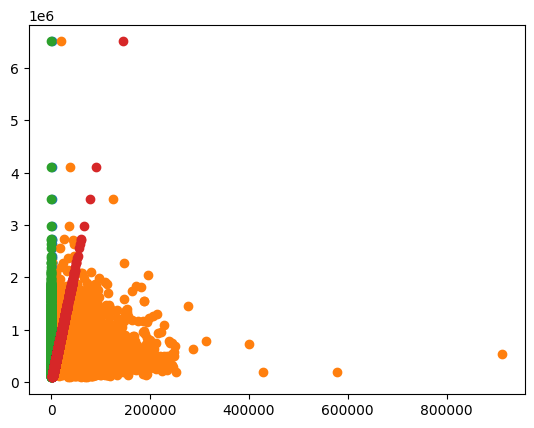

In [26]:
plt.scatter(X["Model Year"],Y)
plt.scatter(X["Driven (Kms)"],Y)
plt.scatter(X["Ownership"],Y)
plt.scatter(X["EMI (monthly)"],Y)

    
    
    


In [27]:
#Implementation of linear Regression Model
from sklearn.linear_model import LinearRegression


In [28]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
prediction=lr.predict(x_test)

In [30]:
#Training score
lr.score(x_train,y_train)

0.9999999983887269

In [31]:
lr.score(x_test,y_test)

0.9999999983067274

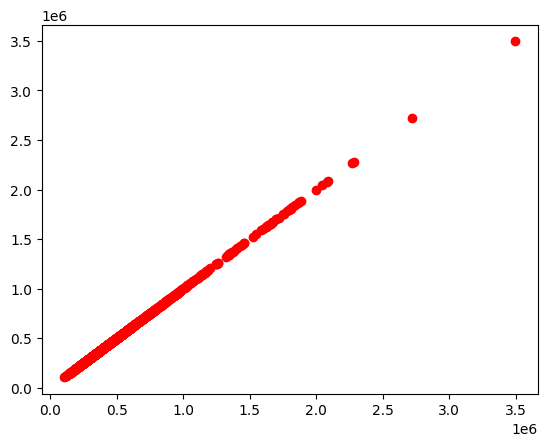

In [32]:
# plot y_test v/s prediction value of model
plt.scatter(y_test,prediction,color='red')


In [33]:
#Evolution Metrics of Model
from sklearn import metrics

In [34]:
print("MAE: ",metrics.mean_absolute_error(y_test,prediction))
print("MSE: ",metrics.mean_squared_error(y_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_absolute_error(y_test,prediction)))
print("R squared: ",metrics.r2_score(y_test,prediction))

MAE:  11.548329365384259
MSE:  174.2927023673074
RMSE:  3.398283296810944
R squared:  0.9999999983067274
